In [1]:
#Preperation

In [15]:
#Importing the libraries as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [3]:
#Uploading the dataset for analysis
dataset = pd.read_csv('data.csv')
target_variable = dataset.iloc[:, 0]
dataset = dataset.drop(dataset.columns[0], axis = 1)
dataset = pd.concat([dataset, target_variable], axis = 1)
print(f'Dataset shape: {dataset.shape}')
print(f'Number of numerical features: {dataset.select_dtypes(include = ["number"]).shape[1]}')
print(f'Number of categorical features: {dataset.select_dtypes(include = ["object"]).shape[1]}')

Dataset shape: (545, 13)
Number of numerical features: 6
Number of categorical features: 7


In [4]:
#Performing encoding the categorical variables
categorical = dataset.select_dtypes(include = ['object'])
numerical = dataset.select_dtypes(include = ['number'])
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['furnishingstatus'])], remainder = 'passthrough')
onehot_encoded = preprocessor.fit_transform(categorical)
label_encoded = np.where(onehot_encoded == 'yes', 1, np.where(onehot_encoded == 'no', 0, onehot_encoded))
encoded_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['furnishingstatus'])
remainder_names = [col for col in categorical.columns if col != 'furnishingstatus']
feature_names = list(encoded_names) + remainder_names
categorical = pd.DataFrame(label_encoded, columns = feature_names)
dataset = pd.concat([categorical, numerical], axis = 1)
dataset.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
0,1.0,0.0,0.0,1,0,0,0,1,1,7420,4,2,3,2,13300000
1,1.0,0.0,0.0,1,0,0,0,1,0,8960,4,4,4,3,12250000
2,0.0,1.0,0.0,1,0,1,0,0,1,9960,3,2,2,2,12250000
3,1.0,0.0,0.0,1,0,1,0,1,1,7500,4,2,2,3,12215000
4,1.0,0.0,0.0,1,1,1,0,1,0,7420,4,1,2,2,11410000


In [5]:
#Splitting the dataset into segments
X = dataset.iloc[ : , 0:14].values
Y = dataset.iloc[ : , -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (408, 14)
X_test shape: (137, 14)
Y_train shape: (408,)
Y_test shape: (137,)


In [6]:
#Performing standardization on numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = dataset.columns[0:14])
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = dataset.columns[0:14])
X_train.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking
0,-0.573577,1.177270,-0.707107,0.390567,-0.470698,-0.707107,-0.208514,-0.714920,-0.581124,-1.550217,-1.354461,-0.57931,0.185426,-0.828720
1,-0.573577,-0.849423,1.414214,-2.560382,-0.470698,-0.707107,-0.208514,1.398757,1.720804,0.097604,0.062514,-0.57931,-0.943737,-0.828720
2,-0.573577,-0.849423,1.414214,-2.560382,-0.470698,-0.707107,-0.208514,-0.714920,-0.581124,-1.050877,-1.354461,-0.57931,-0.943737,-0.828720
3,-0.573577,1.177270,-0.707107,0.390567,-0.470698,1.414214,-0.208514,-0.714920,1.720804,-0.851142,0.062514,-0.57931,0.185426,1.448168
4,-0.573577,-0.849423,1.414214,0.390567,-0.470698,-0.707107,-0.208514,-0.714920,1.720804,0.197472,0.062514,-0.57931,1.314590,0.309724


In [7]:
#Exploration

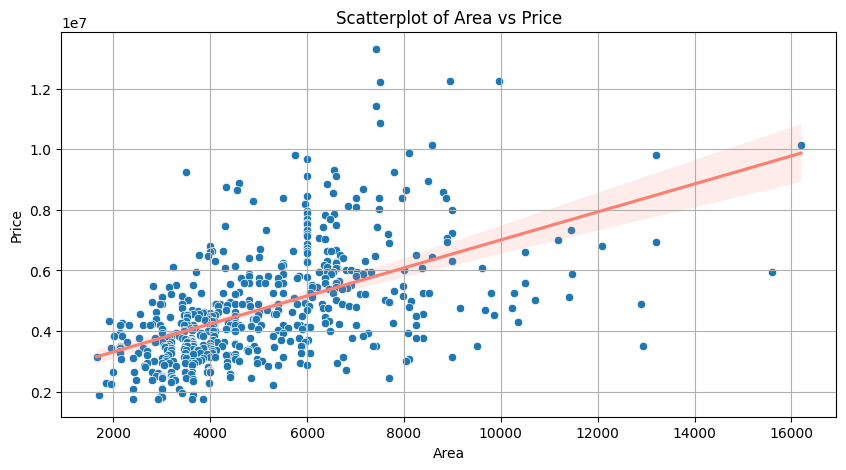

In [8]:
#Relationship between area and price
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'area', y = 'price', data = dataset)
sns.regplot(x = 'area', y = 'price', data = dataset, scatter = False, color = 'salmon')
plt.grid(True)
plt.title('Scatterplot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


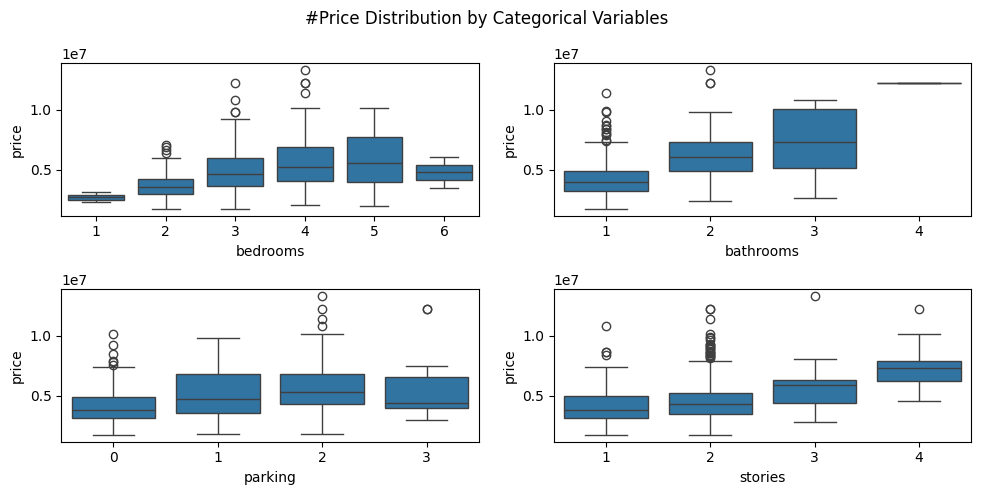

In [9]:
#Price Distribution by Categorical Variables
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))
fig.suptitle('#Price Distribution by Categorical Variables')
features = ['bedrooms', 'bathrooms', 'parking', 'stories']
n_features = len(features)
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(x = feature, y = 'price', data = dataset, ax = axes[i])
    axes[i].tick_params(axis = 'x')
plt.tight_layout()
plt.show()

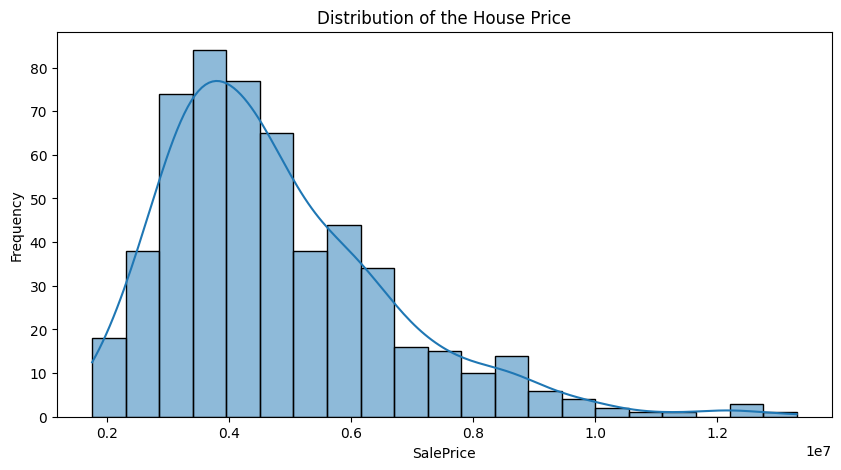

In [10]:
#Checking the distribution of price
plt.figure(figsize = (10, 5))
sns.histplot(dataset['price'], kde = True)
plt.title('Distribution of the House Price')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


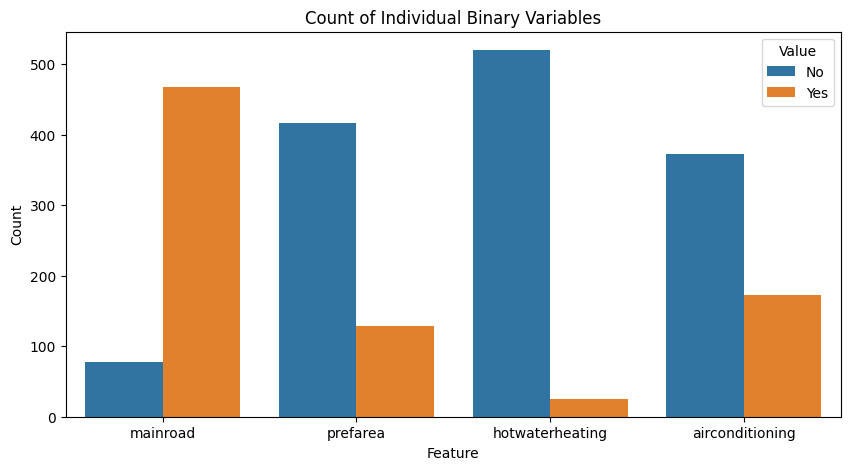

In [12]:
#Visualizing number of binary variable
plt.figure(figsize = (10, 5))
features = ['mainroad', 'prefarea', 'hotwaterheating', 'airconditioning']
dataset_modified = dataset[features]
dataset_modified = dataset_modified.melt(var_name='Feature', value_name='Value')
sns.countplot(data = dataset_modified, x = 'Feature', hue = 'Value')
plt.legend(title = 'Value', loc = 'upper right', labels = ['No', 'Yes'])
plt.title('Count of Individual Binary Variables')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

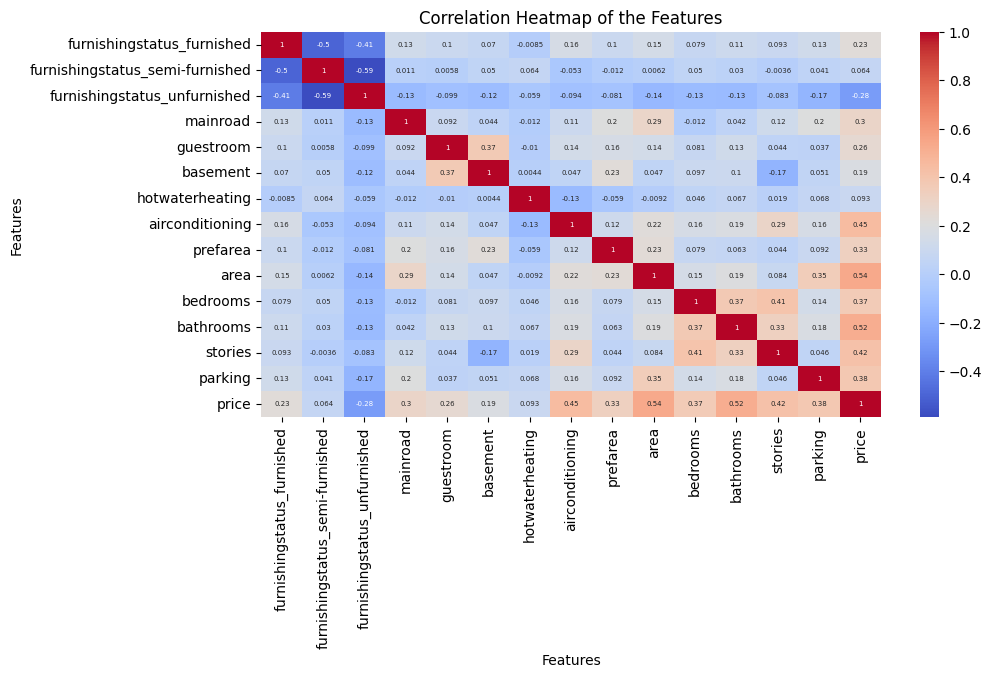

In [13]:
#Checking correlation between the features
plt.figure(figsize = (10, 5))
sns.heatmap(dataset.corr(), annot = True, annot_kws = {'size': 5}, cmap = 'coolwarm')
plt.title('Correlation Heatmap of the Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [17]:
#Training the linear regression model
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred1 = LR.predict(X_test)

In [18]:
#Training the gradient boosted model
GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)
Y_pred2 = GB.predict(X_test)

In [19]:
# Training the random forest model
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
Y_pred3 = RF.predict(X_test)

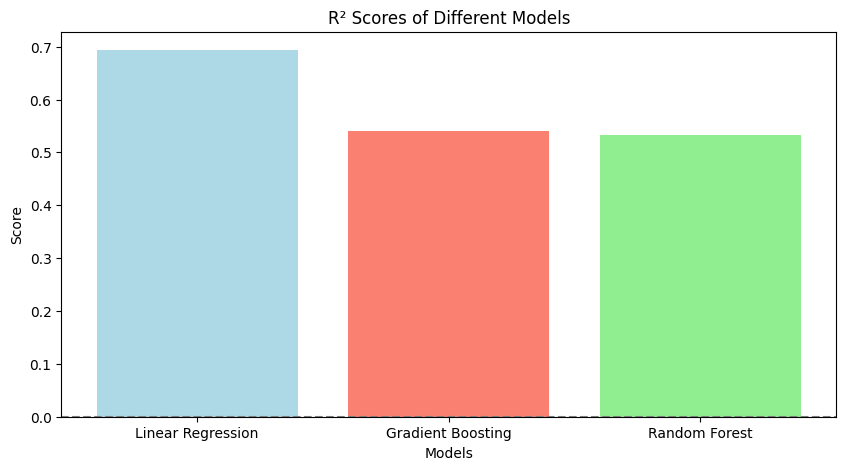

In [28]:
#Calculate R² scores for each model
plt.figure(figsize = (10, 5))
r2_lr = r2_score(Y_test, Y_pred1)
r2_gb = r2_score(Y_test, Y_pred2)
r2_rf = r2_score(Y_test, Y_pred3)
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest']
r2_scores = [r2_lr, r2_gb, r2_rf]
plt.bar(models, r2_scores, color = ['lightblue', 'salmon', 'lightgreen'])
plt.axhline(0, color = 'gray', linestyle = '--')
plt.title('R² Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.show()

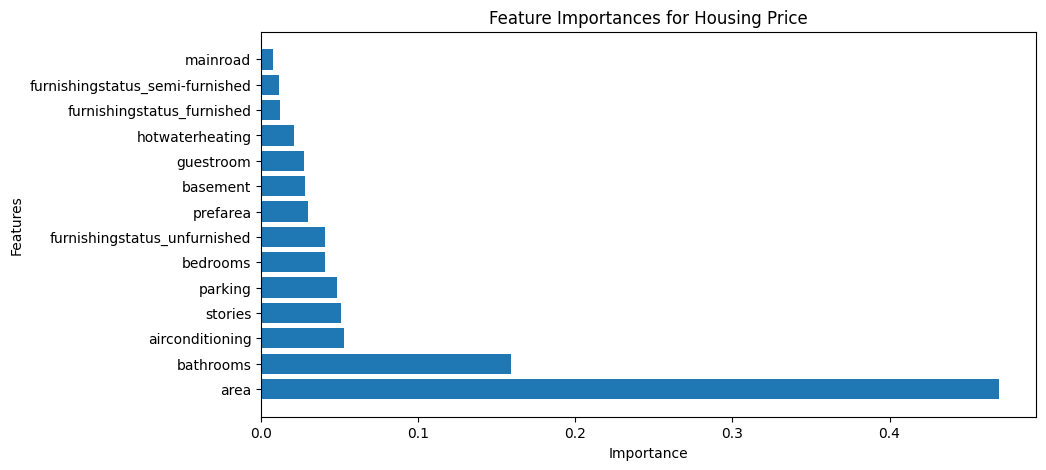

In [45]:
#Visualizing the importance of features
plt.figure(figsize = (10, 5))
importances = RF.feature_importances_
feature_names = X_train.columns
plt.barh(range(len(importances)), importances[indices], align = 'center')
plt.yticks(range(len(importances)), feature_names[indices])
plt.title('Feature Importances for Housing Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

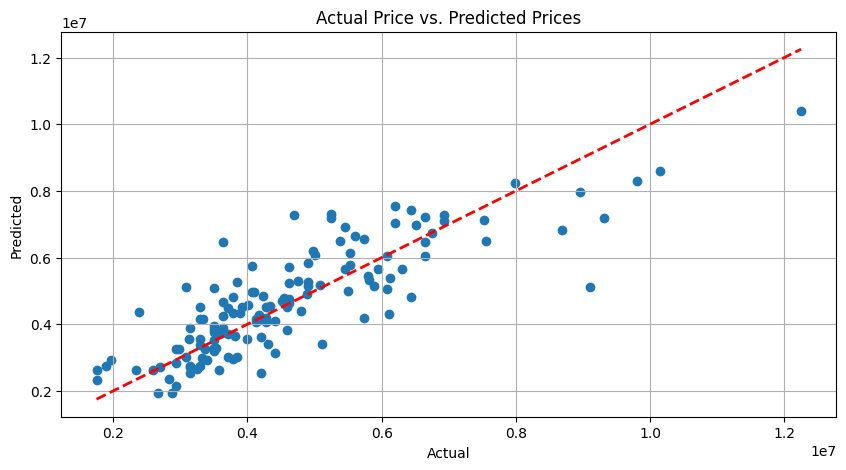

In [30]:
#Difference between actual and predicted
plt.figure(figsize = (10, 5))
plt.scatter(Y_test, Y_pred1)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw = 2)
plt.grid(True)
plt.title('Actual Price vs. Predicted Prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

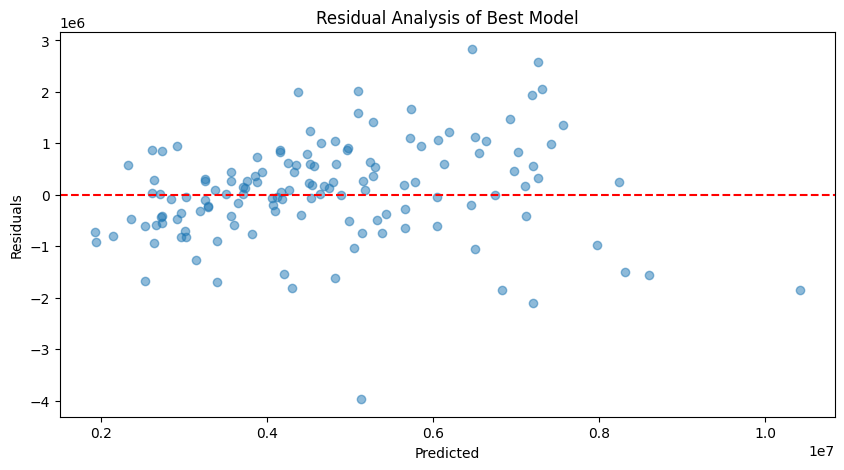

In [35]:
#Analysing residual of best model
plt.figure(figsize = (10, 5))
plt.scatter(Y_pred1, Y_pred1 - Y_test, alpha = 0.5)
plt.axhline(0, color = 'red', linestyle='--')
plt.title('Residual Analysis of Best Model')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

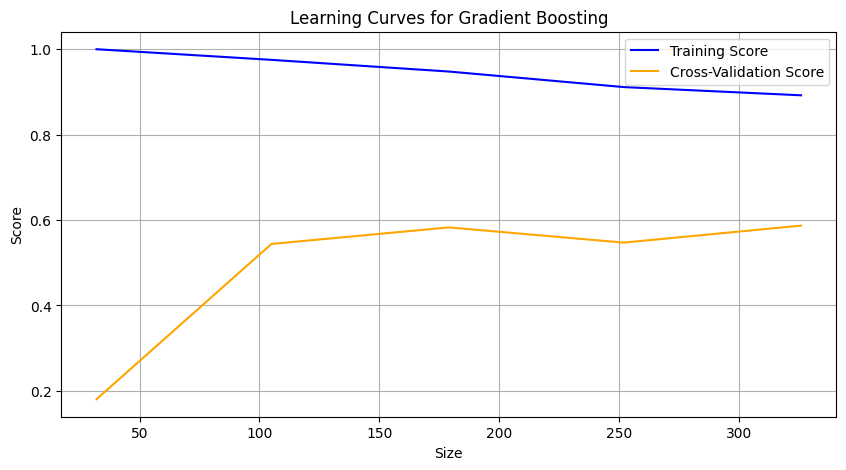

In [46]:
#Checking if improvement is possible
plt.figure(figsize = (10, 5))
train_sizes, train_scores, test_scores = learning_curve(GB, X_train, Y_train, cv = 5, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', color = 'blue')
plt.plot(train_sizes, test_scores_mean, label = 'Cross-Validation Score', color = 'orange')
plt.legend()
plt.grid()
plt.title('Learning Curves for Gradient Boosting')
plt.xlabel('Size')
plt.ylabel('Score')
plt.show()